In [2]:
#getting the data from github repository
import requests
import pandas as pd
url ='https://raw.githubusercontent.com/she-code-africa/SCAMP-Cohort6-Technical-Assessment/master/intermediate/fake_job_postings.csv'
res = requests.get(url, allow_redirects=True)
with open('fake_job_postings.csv','wb') as file:
    file.write(res.content)


C:\Users\HP ELITEBOOK\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [8]:
#Loading file into pandas dataframe
fake = pd.read_csv('fake_job_postings.csv')
fake.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
#checking shape of pandas dataframe
fake.shape

(17880, 18)

In [19]:
#inspecting data types of each pandas series
fake.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [9]:
#Checking for the number of empty nan values
fake.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [21]:
#assigning the mode of each column to the nan values
fake['location']=fake['location'].fillna(fake['location'].mode()[0][0:])
fake['company_profile']=fake['company_profile'].fillna(fake['company_profile'].mode()[0][0:])
fake['description']=fake['description'].fillna(fake['description'].mode()[0][0:])
fake['benefits']=fake['benefits'].fillna(fake['benefits'].mode()[0][0:])
fake['requirements']=fake['requirements'].fillna(fake['requirements'].mode()[0][0:])
fake['employment_type']=fake['employment_type'].fillna(fake['employment_type'].mode()[0][0:])
fake['required_experience']=fake['required_experience'].fillna(fake['required_experience'].mode()[0][0:])
fake['required_education']=fake['required_education'].fillna(fake['required_education'].mode()[0][0:])
fake['industry']=fake['industry'].fillna(fake['industry'].mode()[0][0:])
fake['function']=fake['function'].fillna(fake['function'].mode()[0][0:])

In [25]:
#Removing the department and salary_range because of too much inconsistencies
fake = fake.drop(['department','salary_range'], axis=1)

In [27]:
#making sure the dropped columns were dropped
fake.columns

Index(['job_id', 'title', 'location', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [35]:
#Checking for industeries in the data set
fake['industry'].unique()

array(['Information Technology and Services', 'Marketing and Advertising',
       'Computer Software', 'Hospital & Health Care', 'Online Media',
       'Financial Services', 'Management Consulting', 'Events Services',
       'Internet', 'Facilities Services', 'Consumer Electronics',
       'Telecommunications', 'Consumer Services', 'Construction',
       'Oil & Energy', 'Education Management', 'Building Materials',
       'Banking', 'Food & Beverages', 'Food Production',
       'Health, Wellness and Fitness', 'Insurance', 'E-Learning',
       'Cosmetics', 'Staffing and Recruiting',
       'Venture Capital & Private Equity', 'Leisure, Travel & Tourism',
       'Human Resources', 'Pharmaceuticals', 'Farming', 'Legal Services',
       'Luxury Goods & Jewelry', 'Machinery', 'Real Estate',
       'Mechanical or Industrial Engineering',
       'Public Relations and Communications', 'Consumer Goods',
       'Medical Practice', 'Electrical/Electronic Manufacturing',
       'Hospitality', 'Musi

In [31]:
#number of industeries in the dataset
len(fake['industry'].unique())

131

In [53]:
#filtering pandas series to get fraudulent industeris
ind = fake['industry'].loc[fake['fraudulent']==1]

In [68]:
#returns pandas series showing the industeries and the number of fraudulent job postings
plot = ind.value_counts()
plot

Information Technology and Services    307
Oil & Energy                           109
Accounting                              57
Hospital & Health Care                  51
Marketing and Advertising               45
                                      ... 
Civic & Social Organization              1
Public Safety                            1
Wholesale                                1
Consumer Goods                           1
Online Media                             1
Name: industry, Length: 62, dtype: int64

<BarContainer object of 5 artists>

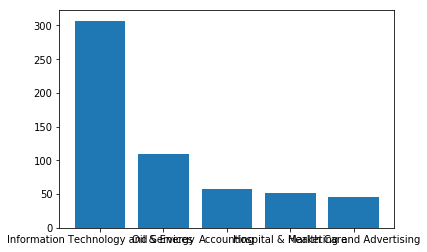

In [67]:
#plotting the top five fraudulent industeries
import matplotlib.pyplot as plt
plt.bar(plot.index[:5], plot.values[:5])

The industry with the highest number of fraudulent is Information Technology and services industry.